<a href="https://colab.research.google.com/github/liyanalukman/Forecasting-Tourist-Arrivals-Trends/blob/master/seasonal_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/itds_saimen.csv')
df.head()
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92674 entries, 0 to 92673
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             92674 non-null  object
 1   Country          92674 non-null  object
 2   SOE              92674 non-null  object
 3   Arrivals         92674 non-null  int64 
 4   Arrivals_Male    92674 non-null  int64 
 5   Arrivals_Female  92674 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


# **1) Seasonality & Pattern Exploration**

### **a. Create seasonal decomposition plots**

<ipython-input-8-11a08af46066>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_arrivals = df['Arrivals'].resample('M').sum()


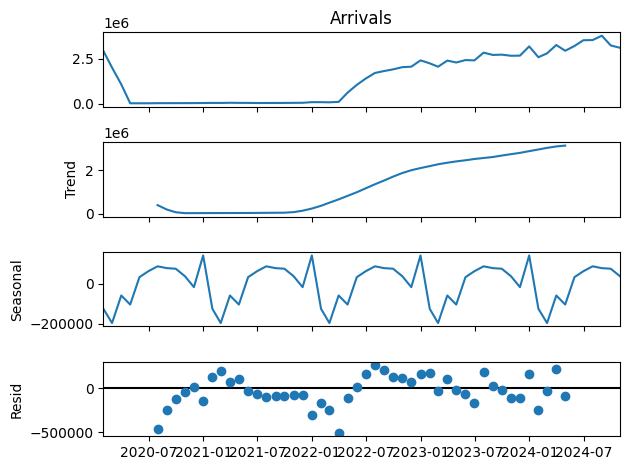

In [ ]:
# Ensure data is resampled monthly (or as needed)
monthly_arrivals = df['Arrivals'].resample('M').sum()

# Decompose using additive or multiplicative
result = seasonal_decompose(monthly_arrivals, model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()


The decomposition plot above breaks down monthly tourist arrivals into:

**Trend** – A clear upward recovery trend starting around early 2022.

**Seasonal** – Consistent repeating peaks, often mid- and end-year (likely due to holidays).

**Residual** – Fluctuations not explained by trend or seasonality (e.g., sudden dips/spikes).

<ipython-input-14-4326bb17200b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_arrivals = df['Arrivals'].resample('M').sum()


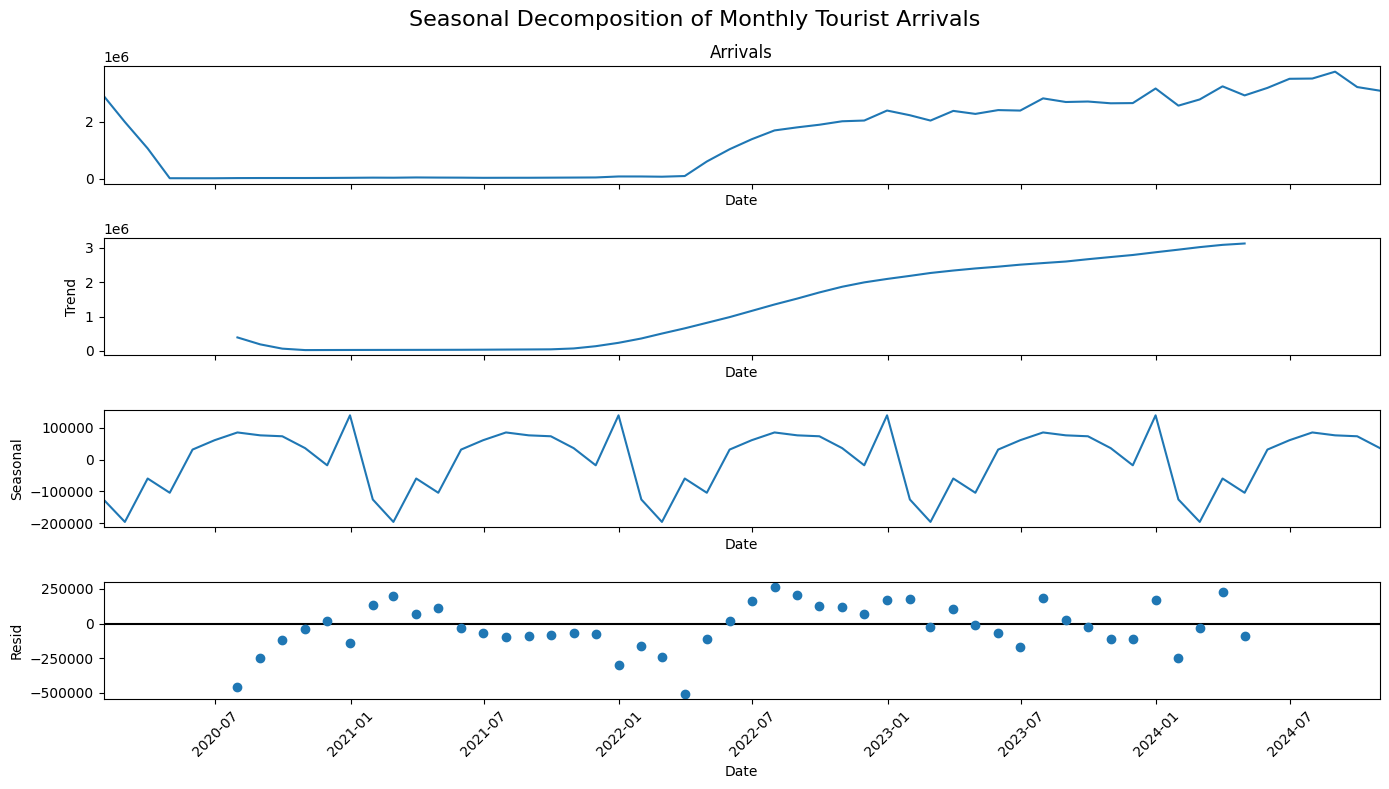

In [ ]:
# Resample to monthly totals (ensure your 'date' column is datetime and set as index)
monthly_arrivals = df['Arrivals'].resample('M').sum()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_arrivals, model='additive', period=12)

# Plot with better size and rotated x-axis labels
fig = result.plot()
fig.set_size_inches(14, 8)  # Make the figure wider and taller

# Rotate x-axis labels for each subplot
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Date")

plt.suptitle("Seasonal Decomposition of Monthly Tourist Arrivals", fontsize=16)
plt.tight_layout()
plt.show()

**1. Observed (Original Series)**

The top plot shows the original monthly total arrivals after resampling and summing the data from all states and countries.

Interpretation:


*   You can clearly see a steep drop starting early 2020, reaching almost zero during the pandemic.
*   Recovery begins around early 2022, and arrivals continue to rise steadily until late 2024.
*   There is some visible fluctuation, suggesting seasonality (e.g., peaks in mid- and end-year months).



**2. Trend Component**

The trend line smooths out short-term fluctuations to show the long-term direction in tourist arrivals.

Interpretation:


*   From 2020 to 2021, the trend is flat or nearly zero — matching the time when global tourism was shut down.
*   Starting mid-2022, the trend begins rising steadily, indicating strong recovery in inbound tourism.
*   By 2024, the trend reaches levels similar to or higher than pre-pandemic, reflecting positive post-COVID rebound.

**3. Seasonal Component**

This isolates repeating short-term patterns that occur in regular intervals (here, yearly).

Interpretation:


*   The seasonality shows repeating waves, indicating higher arrivals during the middle (June–August) and end of the year (November–December).
*   These peaks likely correlate with:

  -     Mid-year school holidays

  -     Year-end holidays and New Year

  -     Tourist campaigns or events


Insight: These patterns are helpful for forecasting and planning—tourism boards can boost promotion and resource allocation during high-demand months.

**4. Residual (Remainder) Component**

Residuals show what’s left over after removing trend and seasonality—i.e., unexplained anomalies or random noise.

Interpretation:

*   Large negative residuals (early 2020–2021): Possibly due to travel bans or COVID-19 shocks not captured by trend/seasonal patterns.
*   Some positive spikes post-2022 may reflect sudden tourism events or rebound surges after borders reopened.

Insight: These deviations are useful for hypothesis generation. You might check news/events for any months with large residual spikes.



###**b. Highlight seasonal trends**

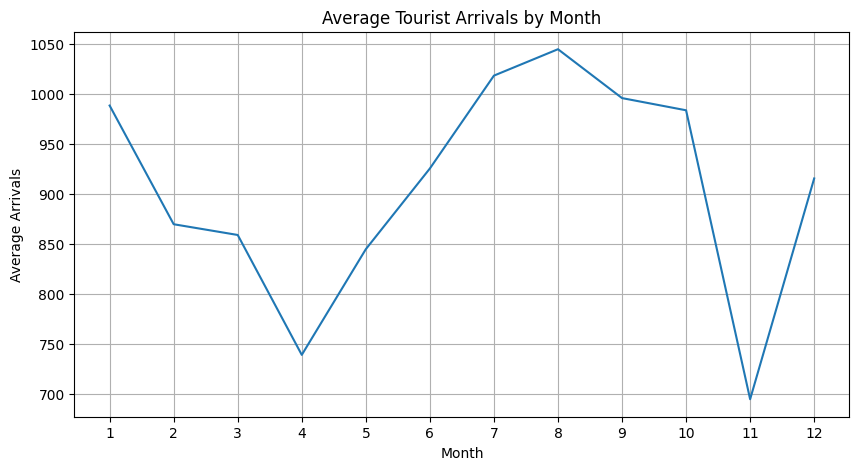

In [ ]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Arrivals'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Tourist Arrivals by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrivals')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

#**2) Outlier and Anomaly Detection**

###**a. Boxplot (to find outliers by year/month)**

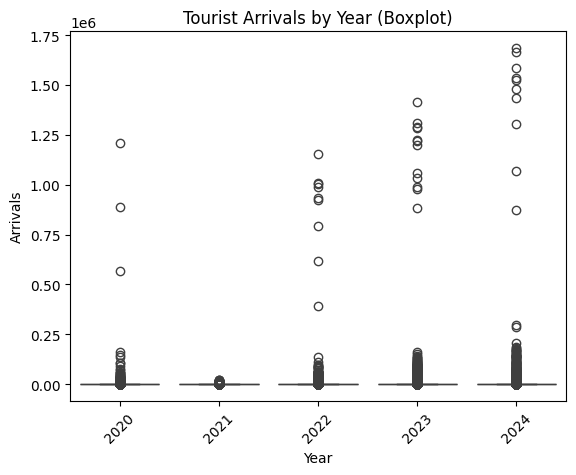

In [ ]:
df['Year'] = df.index.year
sns.boxplot(x='Year', y='Arrivals', data=df)
plt.title('Tourist Arrivals by Year (Boxplot)')
plt.xticks(rotation=45)
plt.show()

###**b. Z-score (to mark outliers programmatically)**

In [ ]:
from scipy.stats import zscore

df['z_score'] = zscore(df['Arrivals'])
outliers = df[np.abs(df['z_score']) > 2]
print(outliers)

           Country       SOE  Arrivals  Arrivals_Male  Arrivals_Female  Month  \
Date                                                                            
2020-01-01     BRN   Sarawak     77835          43927            33908      1   
2020-01-01     CHN     Johor     92472          38137            54335      1   
2020-01-01     CHN  Selangor    163242          75519            87723      1   
2020-01-01     IDN     Johor    146428          75004            71424      1   
2020-01-01     IDN  Selangor    137859          65764            72095      1   
...            ...       ...       ...            ...              ...    ...   
2024-10-01     IND  Selangor     72320          45196            27124     10   
2024-10-01     SGP     Johor   1477605         840174           637431     10   
2024-10-01     SGP  Selangor     48271          25462            22809     10   
2024-10-01     THA  Kelantan     48346          23418            24928     10   
2024-10-01     THA    Perlis

#**3) Graphical Summary**

###**a. Heatmap for monthly trends over years**

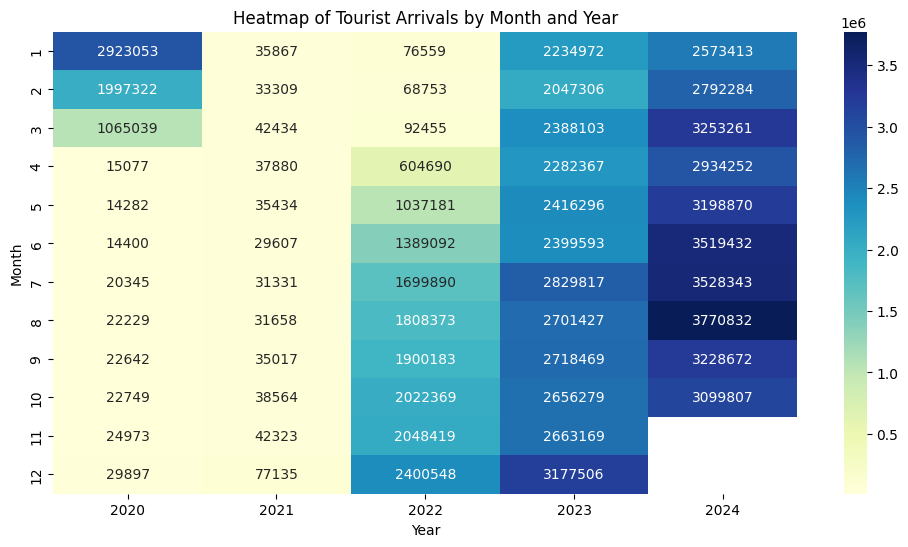

In [ ]:
heatmap_data = df.copy()
heatmap_data['Year'] = heatmap_data.index.year
heatmap_data['Month'] = heatmap_data.index.month
pivot = heatmap_data.pivot_table(index='Month', columns='Year', values='Arrivals', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Tourist Arrivals by Month and Year')
plt.show()

###**b. Histogram or Density Plot**

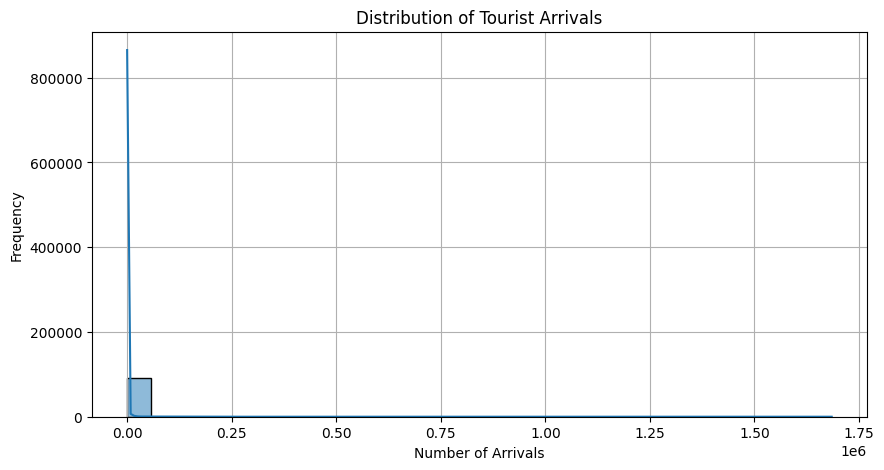

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Arrivals'], bins=30, kde=True)
plt.title('Distribution of Tourist Arrivals')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()